# Exploring Player Engagement: Can Play Time and Player Age Predict Email Subscription for the PLAI Minecraft Server?


<font size = 4> **1)	Introduction**

**1.1	Background Summary**

>The Pacific Laboratory for Artificial Intelligence (PLAI) led by Frank Wood, is a research group collecting data about how people play Minecraft, to develop a new responsive AI. They need better recruitment tactics to bring in more players who will provide large amounts of data, by having ample play time. In this proposal, we will be exploring a broad question of what "kinds" of players are most likely to contribute a large amount of data. This way a predictive analysis would be able to identify exactly what “kinds” of people/players to whom the PLAI should advertise. This can be done by finding any implicit groupings and relationships in the data via visual analyses from which conclusions can be drawn. To make this analysis possible it may be required to wrangle the data such that any missing values are removed, it is grouped by certain criteria, and useless data columns are removed.

**1.2	Research Question**

>This proposal aims to explore if a player’s age group and their playtime can make a predictive analysis on email subscriptions, consequently relating to the amount of data generated. Previous research has shown that customers/clients who are subscribed to a company’s email list, are more loyal to that company (Holland & Baker, 2001). As such we hypothesized that if players are subscribed to the email list, then they are more invested and loyal in the research of PLAI. As a result, they would have a proportionally higher play time than those who are not subscribed, resulting in more data for PLAI. We studied this by creating in-depth visualizations of a player’s age versus their play time coloured according to their subscription status. With this information we made a knn classification with playtime and player age as the predictor variables, to predict whether or not a player will be subscribed to the email list.

**1.3	Data Summary**

>The PLAI has provided two data sets, containing information on their current players: the Player dataset and the Sessions dataset. For this proposal, we will be focusing on the player data set since it provides the most relevant information to the research question. The player dataset is a multivariable dataset which describes the different types of players and their data. It is a data table with 7 columns and 196 rows (observations), which are a mix of character, logical, and double variable types. The 7 columns are defined as:
>- `experience`: A factor variable which is a self-declared level of familiarity by the player with Minecraft, where: 
    - Veteran = Very Familiar
    - Pro = Fairly Familiar 
    - Regular = Familiar 
    - Amateur = Slightly Familiar
    - Beginner = Not Familiar
>  - `subscribe`: A logical variable (True or False), that denotes if a player is signed up for the server email list.
>  - `hashedEmail`: A character variable which is an encrypted version of a player’s email.
>  - `hours_played`: A double variable which denotes the total amount of hours played on the server by a player.  
>  - `name`: A character variable that is the actual name of the player participating in this study.  
>  - `gender`: A character variable which is the self-identified gender of a player participating in this study.
    - Male
    - Female
    - Non-binary
    - Agender
    - Two-Spirited
    - Other
    - Prefer not to say
> - `Age`: A double variable which is the self-declared age of a player participating in this study.


<font size = 4>**2) Methods & Results**

**2.1 Loading in the Data**

>Firstly, we loaded in all necessary library packages required for our proposal and the raw data from github using `read_csv`.

In [1]:
#Loading library packages
library(repr)
library(tidyverse)
library(tidymodels)

#Setting the seed
set.seed(1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Loading in the data set
players_url <- "https://raw.githubusercontent.com/rachelbmgr/toy_ds_project/refs/heads/main/players.csv"
players <- read_csv(players_url)
head(players)
tail(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


**2.2 Cleaning and Wrangling the data**

>Looking at the data table, we notice that the `subscribe` column is `<lgl>` (logical), which must be changed to `<fct>` (factor), as it should be considered a categorical variable. It will also be more helpful to change the FALSE and TRUE observations in this column to 'subscribed' and 'not subscribed' to make it easier to understand future visualizations.
<br> <br>
There are also 'NA' values in the Age column, which we will filter out.
<br> <br>
The original played time data frame is in hours which we will change to minutes, so we have less near 0 values on our visualization (some people may play for less than 1 hour but more than 0 hours)

In [3]:
# Cleaning & Wrangling the data
players_tidy <- players |>
                filter(Age != 'NA') |>
                select(Age, subscribe, played_hours, experience, subscribe)

players_scale_time <- players_tidy |>
                mutate(played_mins = played_hours * 60) |>
                mutate(subscribe = as_factor(subscribe))  |>
                mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not subscribed" = "FALSE")) |>
                filter(played_mins < 451) |>
                select(-played_hours)
                
head(players_scale_time)

Age,subscribe,experience,played_mins
<dbl>,<fct>,<chr>,<dbl>
17,Subscribed,Veteran,228
17,Not subscribed,Veteran,0
21,Subscribed,Amateur,42
21,Subscribed,Regular,6
17,Subscribed,Amateur,0
19,Subscribed,Regular,0


**2.3 Summarizing the data**

>Here we summarize the data by looking at the mean age, and mean played minutes, by using `group_by` the `subscribe` column.

In [4]:
# Data summary
players_summary <- players_scale_time |>
                   group_by(subscribe) |>
                    summarize(mean_age = mean(Age),
                              mean_mins = mean(played_mins))
players_summary

subscribe,mean_age,mean_mins
<fct>,<dbl>,<dbl>
Not subscribed,22.98077,30.11538
Subscribed,19.47287,26.69767


>This tells us that on average those who are not subscribed are typically older and spend more time on the server than those who are subscribed.

**2.3 Visualizing Initial Relationship**

>Here we used ggplot to create a scatter plot with `played_mins` on the x axis, `Age`on the y axis, and whether they were subscribed or not (`subscribe`) through the point's color.

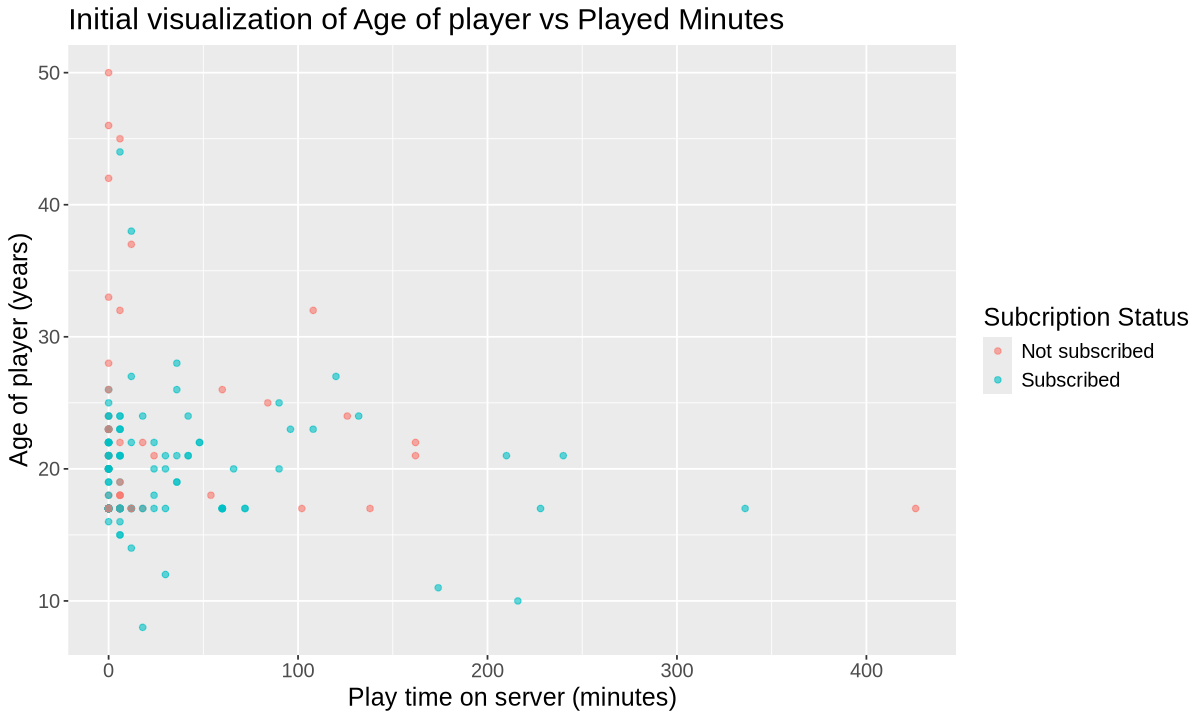

In [5]:
# Visulization of data set pre-knn
options(repr.plot.width = 10, repr.plot.height = 6)
intitial_players_plot <- players_scale_time |>
                   ggplot(aes(x = played_mins, y = Age, color = subscribe)) +
                   geom_point(alpha = 0.6) + 
                   xlab("Play time on server (minutes)") + 
                   ylab("Age of player (years)") + 
                   labs(color = "Subcription Status") +
                   ggtitle("Initial visualization of Age of player vs Played Minutes") + 
                   theme(text = element_text(size = 15))
intitial_players_plot


**2.4 Tuning and determining the best K value for KNN Classification**

>With our initial visualization we are now fairly confident that there may a realtionship between subscription status and a player's playtime and their age. As such, since we have two numerical variables predicting a factor variable the best prediction model to affirm our hypothesis will be a knn classification. Where player age and play time are being used to predict subscription status. Before we can make properly measure accuracy of the designed knn model we have to tune the model to determine the best K value.

In [6]:
# Splitting Dataset
players_split <- initial_split(players_scale_time, prop = 0.75, strata = subscribe) 
players_train <- training(players_split)
players_test <- testing(players_split)

In [7]:
# Determining best KNN value 
# Create tune model
players_recipe <- recipe(subscribe ~ Age + played_mins, data = players_train) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Perform 5 fold cross validation
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

#Sequence of K values being tested
kvals <- seq(from = 1, to = 10, by = 1)

# Creating workflow
knn_results <- workflow() |>
                 add_recipe(players_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = players_vfold, grid = tibble(neighbors = kvals)) |>
                 collect_metrics()

k_accuracies <- knn_results |>
              filter(.metric == "accuracy") |>
              select(neighbors, mean)

k_accuracies

neighbors,mean
<dbl>,<dbl>
1,0.4811762
2,0.4811762
3,0.5711844
4,0.5568987
5,0.5796703
6,0.5719780
7,0.6154050
8,0.6154050
9,0.6436915


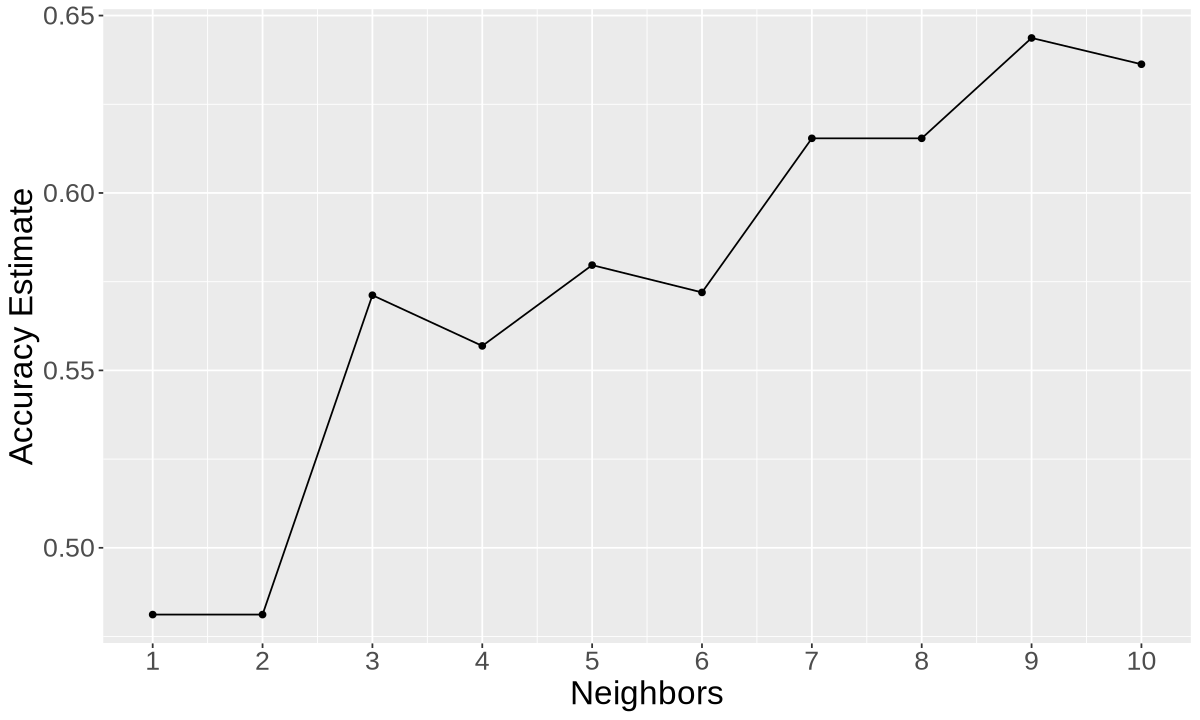

In [8]:
# Cross validation plot
cross_val_plot <- k_accuracies |>  
                  ggplot(aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10))  +
                  theme(text = element_text(size = 20))
cross_val_plot

**2.5 Final KNN Classification Model**

>A K value of 9 seems to be the best choice, as it has the greatest accuracy and no steep drops before or after it. As such we will use it for the actual Knn Classifer, so as to maximize its accuracy. Once the classifier model has made its predictions on the data set, we can determine the quality of our designed model by collecting various metrics such as accuracy, precision, recall, and creating a confusion matrix.

In [12]:
# Evaluation on the test set

fin_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
  set_engine("kknn") |>
  set_mode("classification")

fin_knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(fin_knn_spec) |>
  fit(data = players_train)

# Predictions & Accuracy of the model
players_test_prediction <- predict(fin_knn_fit, players_test) |>
                        bind_cols(players_test)

players_test_prediction |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

players_test_prediction |>
    precision(truth = subscribe, estimate = .pred_class, event_level ="first")

players_test_prediction |>
    recall(truth = subscribe, estimate = .pred_class, event_level ="first")

# Confusion matrix
confusion_mat <- players_test_prediction |>
                 conf_mat(truth = subscribe, estimate = .pred_class)
confusion_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5434783


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.2777778


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.3846154


                Truth
Prediction       Not subscribed Subscribed
  Not subscribed              5         13
  Subscribed                  8         20

In [13]:
#I don't think we need this because it contains the training data too...

# players_predictions <- predict(fin_knn_fit, players_scale_time) |>
#                        bind_cols(players_scale_time)

# metrics <- players_predictions |>
#            metrics(truth = subscribe, estimate = .pred_class) |>
#            filter(.metric == 'accuracy')
# metrics      

# confusion_mat_2 <- players_predictions |>
#                    conf_mat(truth = subscribe, estimate = .pred_class)
# confusion_mat_2

<font size = 4>**3) Discussion**

**3.1 Result Summary**

>In this proposal, we aimed to explore the question: "Can play time and player age predict email subscription for the PLAI Minecraft server?" To answer this question, we created a knn classifier that used played time and player age as predictor variables to predict a player's email subscription status. Our classifier had an accuracy of around 54%, precision of 28%, and recall of 38% when predicting on the testing dataset. These low metrics indicate that our classifer is not as effective when applied to a new set of data.

>Furthermore, the low performance of our classifier also suggests that there may not be a strong relationship between played time, player age, and email subscription, making it harder to make predictions. This contradicts with our expectations as we hypothesized that players with a longer play time are more invested and loyal to the game, therefore would be more likely to subscribe to the email list than those who play less.

**3.2 Impact For PLAI**

>Hello

<font size = 4>**4) References**

(1) Holland, J.; Baker, S. M. Customer participation in creating site brand loyalty. Journal of 	Interactive Marketing 2001, 15 (4), 34–45. https://doi.org/10.1002/dir.1021. 


